In [1]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid

In [11]:
def grid_visualize(imgs, titles=['Target', 'Image', 'Augmented']):
    n = len(imgs)
    plt.figure(figsize=(n*5, 10))

    for i, (img, title) in enumerate(zip(imgs, titles)):           
        plt.subplot(1,n,i+1)
        plt.axis('off')
        plt.title(title)
        plt.imshow(img)

    plt.show()

In [49]:
img_path = "data/midog/110.tiff"
target_path = "data/midog/006.tiff"

In [50]:
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#image = cv2.resize(image, (1280, 1280))

target = cv2.imread(target_path)
target = cv2.cvtColor(target, cv2.COLOR_BGR2RGB)
#target = cv2.resize(target, (1280, 1280))

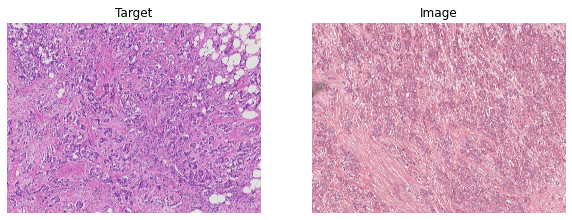

In [32]:
grid_visualize([target, image])

In [51]:
aug1 = A.Compose([A.CenterCrop(256, 256)])
aug = A.Compose([A.FDA([target], beta_limit=0.01, p=1, read_fn=lambda x: x)])

image = aug1(image=image)["image"]
target = aug1(image=target)["image"]
result = aug(image=image)["image"]

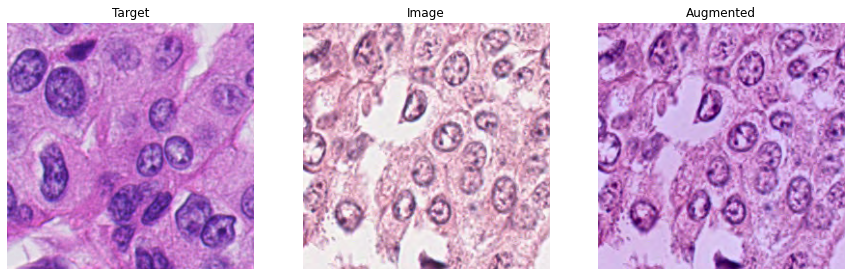

In [52]:
grid_visualize([target, image, result])

In [35]:
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
target = cv2.cvtColor(target, cv2.COLOR_RGB2BGR)

cv2.imwrite("out.jpg", result)
cv2.imwrite("in.jpg", image)

True